In [343]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams[ 'figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

pd.set_option('display.max_rows', 20) #setting max row

#read the data

df = pd.read_csv('movies.csv')

In [344]:
#look at the data
df.head(5)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [345]:
#Check for missing data
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [346]:
#check data values
df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [347]:
df['rating'].sort_values().head()

120     Approved
3808           G
3002           G
5011           G
5685           G
Name: rating, dtype: object

In [348]:
df[df['rating'].isna()]
#it is possibkle for movies to not have rating, falling into catogery of not rated

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
78,Babylon,NaN,Drama,1980,November 1980 (United Kingdom),7.4,1300.0,Franco Rosso,Franco Rosso,David N. Haynes,United Kingdom,NaN,109749.0,Diversity Music,95.0
91,Mantis Fist Fighter,NaN,Action,1980,"July 9, 1982 (United States)",6.7,230.0,Wing-Cho Yip,Hsin-Yi Chang,Ka-Yan Leung,Hong Kong,NaN,NaN,East Asia Film Company,89.0
102,Das Boot,NaN,Adventure,1981,"February 10, 1982 (United States)",8.3,237000.0,Wolfgang Petersen,Wolfgang Petersen,Jürgen Prochnow,West Germany,NaN,11487676.0,Bavaria Film,149.0
298,The State of Things,NaN,Drama,1982,"February 18, 1983 (United States)",7.0,3000.0,Wim Wenders,Robert Kramer,Allen Garfield,West Germany,NaN,3700.0,Gray City,121.0
464,White Star,NaN,Drama,1983,"March 8, 1985 (West Germany)",6.0,235.0,Roland Klick,Karen Jaehne-Lathan,Dennis Hopper,West Germany,100000.0,NaN,NaN,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [349]:
#change to unrated

In [350]:
mask = df['rating'].isna()

In [351]:
df.loc[mask, 'rating'] = df.loc[mask, 'rating'].fillna('Not Rated')

In [352]:
df.isna().sum()
#done for rating

name           0
rating         0
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [353]:
#for released
df[df['released'].isna()]
#since theres a lot of missing values and its just 2 items, i decided to remove these 2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [354]:
df = df.drop([5728, 5730])

In [355]:
df.isna().sum()

name           0
rating         0
genre          0
year           0
released       0
score          3
votes          3
director       0
writer         3
star           1
country        1
budget      2169
gross        187
company       15
runtime        2
dtype: int64

In [356]:
df[df['score'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,Not Rated,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [357]:
#also check using sorted and count to see if theres anything else other than Nan
df['score'].sort_values()


5306    1.9
4594    1.9
5354    1.9
4412    2.1
4342    2.1
       ... 
5243    9.0
2443    9.3
7661    NaN
7662    NaN
7666    NaN
Name: score, Length: 7666, dtype: float64

In [358]:
df['score'].value_counts()

6.6    359
6.4    351
6.2    346
6.7    332
6.5    331
      ... 
2.8      2
9.3      1
2.6      1
2.3      1
9.0      1
Name: score, Length: 72, dtype: int64

In [359]:
#checking online, the robinsons did not have rating, Love by Drowning has a rating of 7.7, its just us has a rating of 8.4
#I decided to remove The Robinsons
df = df.drop([7662])

In [360]:
#change rating for both Love by Drowning and Its Just Us
LBD = (df['name'] == 'Love by Drowning')
df.loc[LBD, 'score'] = df.loc[LBD, 'score'].fillna(7.7)

In [361]:
IJU = (df['name'] == "It's Just Us")
df.loc[IJU, 'score'] = df.loc[IJU, 'score'].fillna(8.4)

In [362]:
#no more null values for score
df[df['score'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [363]:
#check votes
df[df['votes'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",7.7,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",8.4,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [364]:
#get values online and add in

LBD = (df['name'] == 'Love by Drowning')
df.loc[LBD, 'votes'] = df.loc[LBD, 'votes'].fillna(9)

IJU = (df['name'] == "It's Just Us")
df.loc[IJU, 'votes'] = df.loc[IJU, 'votes'].fillna(12)

In [365]:
df[df['writer'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1820,The Garden,Unrated,Drama,1990,1990 (United States),6.4,840.0,Derek Jarman,NaN,Tilda Swinton,United Kingdom,NaN,5006.0,Basilisk Communications,92.0
5834,The Trip,Not Rated,Comedy,2010,"April 24, 2011 (Greece)",7.0,22000.0,Michael Winterbottom,NaN,Steve Coogan,United Kingdom,NaN,3945217.0,Baby Cow Productions,112.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0


In [366]:
# Checking online there is no writers, so replace it with Not Available
NanWriters = df['writer'].isna()
df.loc[NanWriters, 'writer'] = df.loc[NanWriters, 'writer'].fillna('Not Available')

In [367]:
#check star missing value
df[df['star'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
474,The Business of Show Business,Not Rated,History,1983,"February 15, 1983 (Canada)",8.3,79.0,Tom Logan,Tom Logan,NaN,Canada,323562.0,NaN,CTV,55.0


In [368]:
df.loc[df['star'].isna(), 'star'] = df.loc[df['star'].isna(), 'star'].fillna('Tom Logan')

In [369]:
#check country missing value
df[df['country'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,Not Rated,Horror,2019,"June 14, 2019 (United States)",5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [370]:
#country not stated but can assume its from United States as its released in US and Canada only
df.loc[df['country'].isna(), 'country'] = df.loc[df['country'].isna(), 'country'].fillna('United States')

In [371]:
#check budget
df[df['budget'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,Not Rated,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,Not Rated,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,Not Rated,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


In [372]:
df = df.dropna(subset=['budget'])

In [373]:
#Do the same for gross
df = df.dropna(subset=['gross'])

In [374]:
#check the last null values
df[df['company'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
633,The Bear,PG,Biography,1984,"September 28, 1984 (United States)",6.1,270.0,Richard C. Sarafian,Michael Kane,Gary Busey,United States,221000.0,2687148.0,NaN,110.0
1572,Heart of Dixie,PG,Drama,1989,"August 25, 1989 (United States)",5.2,677.0,Martin Davidson,Anne Rivers Siddons,Ally Sheedy,United States,8000000.0,1097333.0,NaN,95.0


In [375]:
#The Bear company Embassy Pictures, Heart of Dixie Orion Pictures
TB = df['name']=='The Bear'
HOD = df['name']=='Heart of Dixie'
df.loc[TB, 'company'] = df.loc[TB, 'company'].fillna('Embassy Pictures')
df.loc[HOD, 'company'] = df.loc[HOD, 'company'].fillna('Orion Pictures')

In [376]:
df[df['runtime'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000.0,38084162.0,Lakeshore Entertainment,NaN


In [377]:
#checked online its 91 mins
df.loc[df['runtime'].isna(), 'runtime'] = df.loc[df['runtime'].isna(), 'runtime'].fillna(91.0)

In [378]:
#no more null values
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [379]:
#Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [380]:
#change datatype of columns from float to int where necessary
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

In [381]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [382]:
#create new year column (based on year and released)
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
#f['released'].astype(datetime)

In [383]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [384]:
df.sort_values(by=['gross'], inplace=False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,Not Rated,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [385]:
#drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [386]:
#look at what variables or columns are most correlated to gross revenue
#check budget and company correlation with gross revenue

<function matplotlib.pyplot.show(close=None, block=None)>

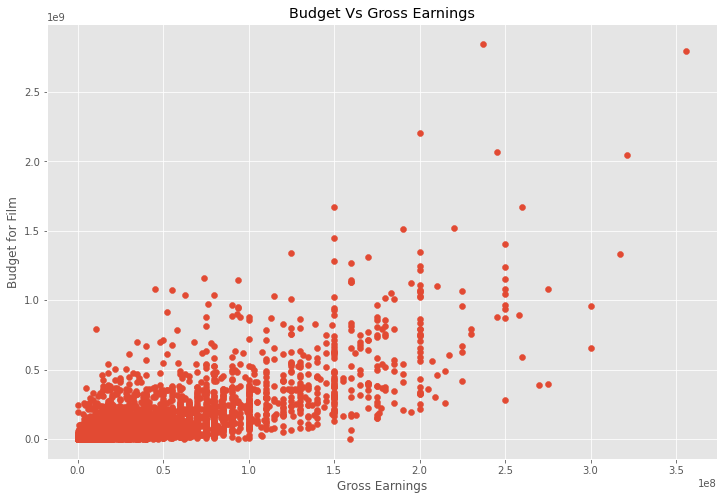

In [387]:
#scatter plot with budget vs groiss

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget Vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')
plt.show

In [388]:
dfgross = df.sort_values(by=['gross'], inplace=False, ascending = False)

In [389]:
dfgross.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<AxesSubplot: xlabel='budget', ylabel='gross'>

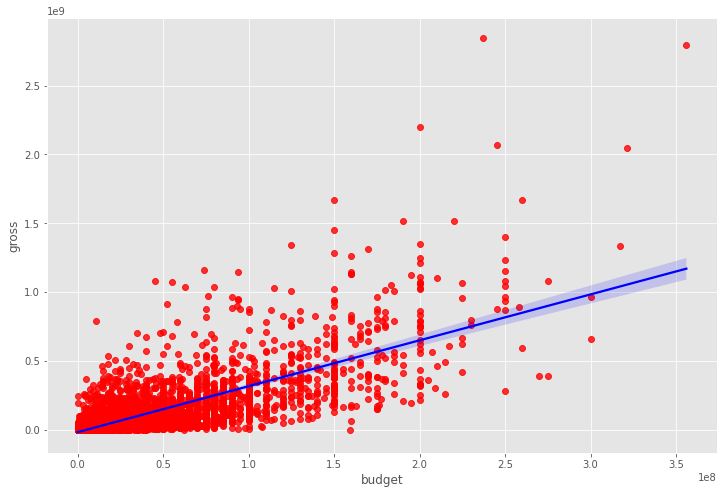

In [390]:
#plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws= {'color':'blue'})

In [391]:
#from this we can clearly see that budget and gross are correlated, just not by how much

In [392]:
#look at correlation
df.corr() #pearson(the one we using here), kendall, spearman
#only numerical fields

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074019,0.998641
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414694,0.061029
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352472,0.202883
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318551,0.320245
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275631,0.268626
runtime,0.074019,0.414694,0.352472,0.318551,0.275631,1.000000,0.074251
yearcorrect,0.998641,0.061029,0.202883,0.320245,0.268626,0.074251,1.000000


In [393]:
df.corr(method='pearson') #by default using pearson

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074019,0.998641
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414694,0.061029
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352472,0.202883
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318551,0.320245
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275631,0.268626
runtime,0.074019,0.414694,0.352472,0.318551,0.275631,1.000000,0.074251
yearcorrect,0.998641,0.061029,0.202883,0.320245,0.268626,0.074251,1.000000


In [394]:
#High correlation with budget ansd gross (0.74)

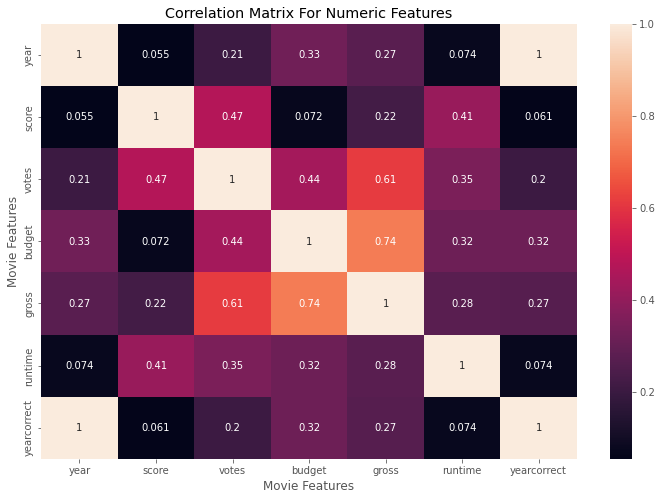

In [395]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix For Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [396]:
#Look at Company

dfgross.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [397]:
#numerize all objects

df_numerized = dfgross

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,387,5,0,2009,528,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162.0,2009
7445,389,5,0,2019,138,8.4,903000,106,515,1474,47,356000000,2797501328,987,181.0,2019
3045,4923,5,6,1997,535,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194.0,1997
6663,3656,5,0,2015,530,7.8,876000,770,1810,357,47,245000000,2069521700,949,138.0,2015
7244,390,5,0,2018,146,8.4,897000,106,515,1474,47,321000000,2048359754,987,149.0,2018


In [398]:
dfgross.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,387,5,0,2009,528,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162.0,2009
7445,389,5,0,2019,138,8.4,903000,106,515,1474,47,356000000,2797501328,987,181.0,2019
3045,4923,5,6,1997,535,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194.0,1997
6663,3656,5,0,2015,530,7.8,876000,770,1810,357,47,245000000,2069521700,949,138.0,2015
7244,390,5,0,2018,146,8.4,897000,106,515,1474,47,321000000,2048359754,987,149.0,2018


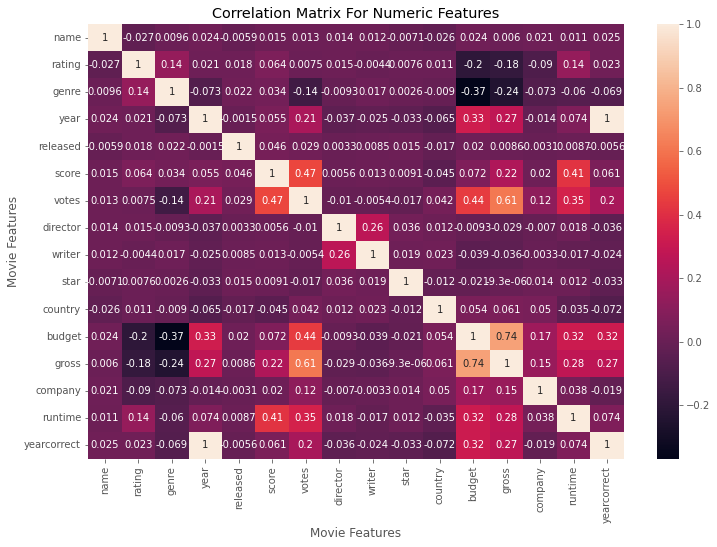

In [399]:
#Now can include the catogeries into the correlation checking

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix For Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [400]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.027217,0.009617,0.024435,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.025592,0.023698,0.005966,0.021147,0.010778,0.024734
rating,-0.027217,1.000000,0.141538,0.021213,0.018460,0.064378,0.007462,0.014667,-0.004442,0.007553,0.010741,-0.199193,-0.178529,-0.089631,0.139255,0.023188
genre,0.009617,0.141538,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.009024,-0.368900,-0.244380,-0.072905,-0.059952,-0.068848
year,0.024435,0.021213,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.065371,0.327781,0.274264,-0.014052,0.074019,0.998641
released,-0.005896,0.018460,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017227,0.019888,0.008614,-0.003117,0.008692,-0.005625
score,0.014955,0.064378,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.045201,0.071792,0.222143,0.020416,0.414694,0.061029
votes,0.012915,0.007462,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.041694,0.440021,0.614904,0.119011,0.352472,0.202883
director,0.013699,0.014667,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011894,-0.009340,-0.029366,-0.006962,0.018077,-0.036281
writer,0.011602,-0.004442,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022792,-0.039420,-0.035999,-0.003258,-0.016891,-0.024397
star,-0.007109,0.007553,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.011617,-0.021282,-0.000009,0.014175,0.012423,-0.033168


In [401]:
#use unstacking to be able to quickly see which one has the highest from the table

correlation_mat = df_numerized.corr(method='pearson')

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.027217
             genre          0.009617
             year           0.024435
             released      -0.005896
                              ...   
yearcorrect  budget         0.320245
             gross          0.268626
             company       -0.018827
             runtime        0.074251
             yearcorrect    1.000000
Length: 256, dtype: float64

In [402]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368900
budget       genre         -0.368900
gross        genre         -0.244380
genre        gross         -0.244380
rating       budget        -0.199193
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [403]:
high_corr = sorted_pairs[(sorted_pairs) >0.5]

high_corr

gross        votes          0.614904
votes        gross          0.614904
gross        budget         0.740395
budget       gross          0.740395
year         yearcorrect    0.998641
                              ...   
             year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 22, dtype: float64

In [404]:
#Votes and Budget have the highest correlation to gross earnings